## Setup

In [1]:
%run ../setup.ipynb

## Carico Dati per l'analisi

In [2]:
# cartella dove ci sono i dati da analizzare
folder = "../setup_dati/"

# importo dati
df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)

In [3]:
df_answer = pd.read_csv("../../data/prolific/Dataframe/workers_answers.csv")

In [4]:
df_url = pd.read_csv("../../data/prolific/Dataframe/workers_urls.csv")

## Analisi

In [5]:
df_analisi = df_all.copy()

In [6]:
dimensioni_da_analizzare = ["query_amount", 
                            "response_position",
                            "selected_amount"]


1 parte

- query_amount = numero di ricerche effettuate sul motore di ricerca
- response_position = La posizione (prima, seconda, ecc.) del link all’interno della pagina dei risultati
della query.
- selected_amount = numero di volte che l’utente ha selezionato link di giustificazione

### Preparo i dati

In [7]:
# estraggo i worker che mi servono
workers = df_all["worker_id"].unique()

In [8]:
# query amount
for worker in workers:
    df_worker = df_url[df_url["worker_id"]==worker]
    print(worker, len(df_worker["query_text"].unique()))

55b645b1fdf99b1c02906872 12
55ca03e1fdf99b2735fc1dde 8
5658000ca9872d0011e1ba26 9
565bdfcec121fe0012fc3897 13
567dd32b4f0ef30006dbb718 8
56caf7b564c068000c4d798a 9
56f9364e895094000c8f4967 10
57bfc1beef05670001ee84c2 11
57d940a5995a0b00016350be 9
57e7bb4e73e67300012b8e2a 21
583ec287ad2f4300014b355a 9
58c1ce3c3783090001b49355 8
58d069219dbe3f0001258793 8
58d3dad59dbe3f0001258f66 13
58d9a79c33fef3000118abdf 13
58f0fca0d40252000192f201 9
5916bba1c40353000150c46c 12
5993020a5f49420001caf86b 8
599ec7dc617ca80001fcd124 8
59d0ec2446447f00011f0254 8
5a3bdd2c8d005a0001829f3e 9
5a84f454ae9a0b0001a9e4e5 15
5a8d8079190420000156435d 19
5b9fa85b4bca610001d791f3 9
5c024be169406e00014e0b8e 17
5c0fcccc1f6f150001487111 9
5c8541b79c5a3000016b2597 8
5c8eb16ed169ac0001c27629 10
5ca8f48c5689db001729e1f4 8
5caa4435fd086000196ddf13 10
5cb67a7ab73e8a001507fae5 8
5cfb5233df7d70001619ca90 9
5d163b2c601cd7000172713c 10
5d1d13c26ce490001692baa2 14
5d2215e737363e0001651a63 9
5d29cc8869a747001acdb3c1 16
5d31266f466c

In [9]:
df_query = []
for worker in workers:
    df_worker = df_url[(df_url["worker_id"]==worker) & (df_url["document_id"]!="GOLD_HIGH") & (df_url["document_id"]!="GOLD_LOW")]
    # elimino i document_id = GOLD_HIGH e GOLD_LOW
    for doc in df_worker["document_id"].unique():
        l = len(df_worker[df_worker["document_id"] == doc]["query_text"].unique())
        df_query.append([worker, doc, l])
df_query = pd.DataFrame(df_query, columns=["worker_id", "document_id", "query_amount_per_doc"])

# totale per ogni worker
df_query["query_amount_total_for_a_worker"] = df_query.groupby("worker_id")["query_amount_per_doc"].transform("sum")

In [10]:
# sono tutti univoci
for v in df_all[["worker_id","doc_id","doc_evidence_url"]].value_counts():
    if v > 1:
        print(v)

In [11]:
df_url.columns

Index(['worker_id', 'paid', 'try_last', 'try_current', 'document_index',
       'document_id', 'dimension_index', 'dimension_name', 'query_index',
       'query_text', 'query_timestamp', 'query_timestamp_parsed',
       'response_index', 'response_url', 'response_name', 'response_snippet',
       'response_uuid', 'index_selected'],
      dtype='object')

In [12]:
# response position
# trovo le informazioni in df_url[["worker_id","document_id","response_url","response_index"]]

# --> seleziono solo quello che il worker ha selezionato

# per ogni coppia worker + doc_id prendo l'url che l'utente ha selezionato

df_query["doc_evidence_url"] = 0
for row in df_all[["worker_id","doc_id","doc_evidence_url"]].values:
    df_query.loc[(df_query["worker_id"]==row[0]) & (df_query["document_id"]==row[1]), "doc_evidence_url"] = row[2]

df_query["response_position"] = 0

for row in df_url[["worker_id","document_id","response_url","response_index"]].values:
    if row[2] != "GOLD_HIGH" and row[2] != "GOLD_LOW":
        df_query.loc[(df_query["worker_id"]==row[0]) & (df_query["document_id"]==row[1]) & (df_query["doc_evidence_url"]==row[2]), "response_position"] = row[3]
        


In [13]:
df_query

,worker_id,document_id,query_amount_per_doc,query_amount_total_for_a_worker,doc_evidence_url,response_position
0,55b645b1fdf99b1c02906872,joni-ernst-target-describing-11th-hour-obama-r...,3,10,https://www.desmoinesregister.com/story/news/p...,0
1,55b645b1fdf99b1c02906872,gop-challenger-overstates-parole-boards-record...,1,10,https://buffalonews.com/astorino-overstates-re...,0
2,55b645b1fdf99b1c02906872,greene-twists-logic-and-facts-pedophilia-charg...,1,10,https://www.dailymail.co.uk/news/article-10688...,3
3,55b645b1fdf99b1c02906872,barnes-partially-right-claim-johnson-has-recei...,1,10,https://www.usinnews.com/has-sen-ron-johnson-r...,2
4,55b645b1fdf99b1c02906872,david-jolly-says-kathleen-peters-wont-take-sta...,1,10,https://www.tampabay.com/archive/2013/12/27/da...,0
...,...,...,...,...,...,...
1194,6301b7caed960c3930057c7a,fact-checking-bernie-sanders-attack-florida-go...,1,7,https://news.yahoo.com/desantis-dumps-standard...,2
1195,6301b7caed960c3930057c7a,marjorie-taylor-greene-shared-edited-image-hig...,1,7,https://www.msn.com/en-us/health/medical/this-...,2
1196,6301b7caed960c3930057c7a,some-teachouts-donors-also-gave-super-pacs,2,7,https://www.nrcc.org/2016/10/28/zephyr-teachou...,0
1197,6301b7caed960c3930057c7a,ron-desantis-exaggerates-outstanding-graduate-...,1,7,https://www.statesman.com/story/news/politics/...,0


In [14]:
# selected amount
for worker in df_answer["worker_id"].unique():
    df_worker = df_url[df_url["worker_id"]==worker]
    selected = df_worker["index_selected"]
    count = 0
    for i in selected:
        if i > -1:
            count += 1
    print(worker, count)

62c61250e85c96fc1794c7db 8
6272919c35ab7659d0754c07 10
5d338bb02381b7001761694e 9
5e531b2205acdb33c0f5f24c 11
627935c4e5d7e70b502e206e 9
61151fdceebe67102a0983ad 8
615dbf532dce1f14ef1b3ddc 9
62c8d23e8eb59ca0306d4463 8
5c55c45f53fba80001bcf323 17
62ffe924cae68af25dd6c1d3 8
5e556536e1cbcd56c3a50342 8
58d9a79c33fef3000118abdf 10
6298f812c9026fec4b2f028f 8
5e7a6846f0f631000a4e2b9d 8
62ee44b74f44e600e27a3507 12
62b0b9d60841bfa66838f436 9
58f0fca0d40252000192f201 9
60fe12e72041bc1636d08771 13
5dfd077e3690bd03bfa91d48 8
62da96ec6d17660ed2b57be6 8
60fde74940100db428b34a06 8
627524293d738cdeebb0d481 9
62fe9bebf5d09924e321a32c 10
6273366f084fd44cef93529d 10
5dd3cfb7b103ee3b428185b2 12
62ef2768d2ff53772298a265 10
56f9364e895094000c8f4967 30
6290ecde88d58cd1e5ce00e7 4
5e46d70ab1f1c5000d96800d 8
62dbdb8628c86b2a3824da16 8
5e9c8deb90dd470441c7f98e 10
5ceaf25e4c91150001cc89d0 28
611dbfe946412da7f8c130f7 8
6294c9a9c673efce2f6528dc 9
6056bcf1cee7a41435889255 19
5a78b8355292b800012284ca 18
5d1d13c26ce49

In [15]:
df_query["selected_amount"] = 0
df_query["selected_amount_total_for_a_worker"] = 0

for worker in workers:
    tot = 0
    for doc in df_url[df_url["worker_id"]==worker]["document_id"].unique():
        if doc != "GOLD_HIGH" and doc != "GOLD_LOW":
            df_worker = df_url[(df_url["worker_id"]==worker) & (df_url["document_id"]==doc)]
            selected = df_worker["index_selected"]
            count = 0
            for i in selected:
                if i > -1:
                    count += 1
            tot += count
            df_query.loc[(df_query["worker_id"]==worker) & (df_query["document_id"]==doc), "selected_amount"] = count
    df_query.loc[df_query["worker_id"]==worker, "selected_amount_total_for_a_worker"] = tot
    

2 parte

- query_text = Il testo della query effettuata.
- response_name = Il titolo del contenuto del link, che appare nella visualizzazione dei risultati delle query.
- response_snippet = Un frammento del contenuto del link, che appare nella visualizzazione dei risultati
delle query.

Si confronta statement_text con query text, name e snippet --> prendo in considerazione solo quelli che poi sono stati utilizzati effettivamente anche poi come giustificazione

In [16]:
# info da # df_url[[ "worker_id", "document_id", "response_url", "query_text", "response_name", "response_snippet"]]
df_query["query_text"] = 0
df_query["response_name"] = 0
df_query["response_snippet"] = 0

for index,row in df_query.iterrows():
    df_worker = df_url[(df_url["worker_id"]==row["worker_id"]) & (df_url["document_id"]==row["document_id"])]
    df_query.loc[index, "query_text"] = df_worker["query_text"].unique()[0]
    df_query.loc[index, "response_name"] = df_worker["response_name"].unique()[0]
    df_query.loc[index, "response_snippet"] = df_worker["response_snippet"].unique()[0]


In [17]:
df_query.columns

Index(['worker_id', 'document_id', 'query_amount_per_doc',
       'query_amount_total_for_a_worker', 'doc_evidence_url',
       'response_position', 'selected_amount',
       'selected_amount_total_for_a_worker', 'query_text', 'response_name',
       'response_snippet'],
      dtype='object')

In [18]:
df_query.columns = ['worker_id', 'doc_id', 'query_amount_per_doc',
                    'query_amount_total_for_a_worker', 'doc_evidence_url',
                    'response_position', 'selected_amount_per_doc',
                    'selected_amount_total_for_a_worker', 'query_text', 'response_name',
                    'response_snippet']
df_query

,worker_id,doc_id,query_amount_per_doc,query_amount_total_for_a_worker,doc_evidence_url,response_position,selected_amount_per_doc,selected_amount_total_for_a_worker,query_text,response_name,response_snippet
0,55b645b1fdf99b1c02906872,joni-ernst-target-describing-11th-hour-obama-r...,3,10,https://www.desmoinesregister.com/story/news/p...,0,1,6,11th-hour rule that entrenches federal family,Fact check: Joni Ernst on target describing '1...,"She said that her effort, in cooperation with ..."
1,55b645b1fdf99b1c02906872,gop-challenger-overstates-parole-boards-record...,1,10,https://buffalonews.com/astorino-overstates-re...,0,1,6,Weâve got a parole board right now that has ...,Astorino overstates record on paroles of 'cop ...,"""We've got a parole board right now that has r..."
2,55b645b1fdf99b1c02906872,greene-twists-logic-and-facts-pedophilia-charg...,1,10,https://www.dailymail.co.uk/news/article-10688...,3,1,6,Marjorie Taylor Greene says pro-pedophile,Marjorie Taylor Greene said 3 GOP senators are...,"She called them ""pro-pedophile,"" picking up on..."
3,55b645b1fdf99b1c02906872,barnes-partially-right-claim-johnson-has-recei...,1,10,https://www.usinnews.com/has-sen-ron-johnson-r...,2,1,6,U.S. Sen. Ron Johnson received $1.2 million fr...,Fact-check: Has Sen. Ron Johnson received $1.2...,Barnes claimed Johnson has taken $1.2 million ...
4,55b645b1fdf99b1c02906872,david-jolly-says-kathleen-peters-wont-take-sta...,1,10,https://www.tampabay.com/archive/2013/12/27/da...,0,1,6,Kathleen Peters refuses to âtake a standâ ...,DAVID JOLLY SAYS KATHLEEN PETERS WON'T 'TAKE A...,"""Kathleen Peters refuses to 'take a stand' to ..."
...,...,...,...,...,...,...,...,...,...,...,...
1194,6301b7caed960c3930057c7a,fact-checking-bernie-sanders-attack-florida-go...,1,7,https://news.yahoo.com/desantis-dumps-standard...,2,1,6,desantis standardized testing kindergarten,Gov. DeSantis signs bill eliminating standardi...,Gov. Ron DeSantis has signed a bill replacing ...
1195,6301b7caed960c3930057c7a,marjorie-taylor-greene-shared-edited-image-hig...,1,7,https://www.msn.com/en-us/health/medical/this-...,2,1,6,marjorie taylor greene highland park rehab psy...,Marjorie Taylor Greene shared an edited image ...,"July 7, 2022 Rep. Marjorie Taylor Greene, R-Ga..."
1196,6301b7caed960c3930057c7a,some-teachouts-donors-also-gave-super-pacs,2,7,https://www.nrcc.org/2016/10/28/zephyr-teachou...,0,1,6,Zephyr Teachout says she is against Super PACs...,BONUS EDITON of Zephyr Teachout the pandering ...,"Itâs another hypocritical move for Teachout,..."
1197,6301b7caed960c3930057c7a,ron-desantis-exaggerates-outstanding-graduate-...,1,7,https://www.statesman.com/story/news/politics/...,0,1,6,60% of student debt graduate school,Fact-check: How much of student debt is gradua...,The Congressional Budget Office looked at the ...


In [19]:
df_analisi = df_analisi.merge(df_query, on=["worker_id", "doc_id"])

In [20]:
df_analisi[[ "doc_id","query_amount_per_doc", "query_amount_total_for_a_worker", "response_position", "selected_amount_per_doc", "selected_amount_total_for_a_worker",
             "query_text", "response_name", "response_snippet", "doc_statement_text",
             "doc_truthfulness_index","quartile","mean","sovra"]].head(10)

,doc_id,query_amount_per_doc,query_amount_total_for_a_worker,response_position,selected_amount_per_doc,selected_amount_total_for_a_worker,query_text,response_name,response_snippet,doc_statement_text,doc_truthfulness_index,quartile,mean,sovra
0,joni-ernst-target-describing-11th-hour-obama-r...,3,10,0,1,6,11th-hour rule that entrenches federal family,Fact check: Joni Ernst on target describing '1...,"She said that her effort, in cooperation with ...","The Obama administration issued an ""11th-hour ...",4.0,other,3.4,other
1,gop-challenger-overstates-parole-boards-record...,1,10,0,1,6,Weâve got a parole board right now that has ...,Astorino overstates record on paroles of 'cop ...,"""We've got a parole board right now that has r...",âWeâve got a parole board right now that h...,1.0,other,1.4,other
2,greene-twists-logic-and-facts-pedophilia-charg...,1,10,3,1,6,Marjorie Taylor Greene says pro-pedophile,Marjorie Taylor Greene said 3 GOP senators are...,"She called them ""pro-pedophile,"" picking up on...","Says Sens. Lisa Murkowski, Susan Collins and M...",1.0,correct_false,1.2,pants-on-fire
3,barnes-partially-right-claim-johnson-has-recei...,1,10,2,1,6,U.S. Sen. Ron Johnson received $1.2 million fr...,Fact-check: Has Sen. Ron Johnson received $1.2...,Barnes claimed Johnson has taken $1.2 million ...,"Says U.S. Sen. Ron Johnson, his prospective op...",1.0,other,2.6,other
4,david-jolly-says-kathleen-peters-wont-take-sta...,1,10,0,1,6,Kathleen Peters refuses to âtake a standâ ...,DAVID JOLLY SAYS KATHLEEN PETERS WON'T 'TAKE A...,"""Kathleen Peters refuses to 'take a stand' to ...","""Kathleen Peters refuses to âtake a standâ...",4.0,other,2.7,other
5,john-boehner-says-stimulus-bill-was-rushed-pas...,3,10,1,1,6,did not have three days to read the bill,Immigration Bill Would Take Nearly Three Days ...,The 844 page Senate immigration bill (S. 744) ...,Members of Congress did not have three days to...,5.0,other_true,4.0,true
6,ron-desantis-exaggerates-outstanding-graduate-...,1,6,0,1,6,"âThe student debt that is out there, almost ...",Fact-check: How much of student debt is gradua...,"Of $1.4 trillion in total debt, CBO said, abou...","âThe student debt that is out there, almost ...",1.0,other,2.6,other
7,ohios-mandel-repeats-false-claim-stolen-2020-e...,1,6,0,1,6,The 2020 election âwas stolen from Donald J....,"Josh Mandel, Ohio Senate Candidate, Believes 2...","Josh Mandel, one of the six Ohio Senate candid...",The 2020 election âwas stolen from Donald J....,0.0,correct_false,1.1,pants-on-fire
8,lauren-boebert-wrong-founding-fathers-intent-e...,1,6,3,1,6,boebert church is supposed to direct governmen...,Lauren Boebert says the church should direct g...,âThe church is supposed to direct the govern...,The Founding Fathers of the United States inte...,0.0,other,2.1,other
9,hard-pin-down-growing-cost-unused-border-mater...,1,6,8,1,6,Joni Ernst $3 million tax dollars border wall ...,Is U.S. spending $3M daily to guard border wal...,Gazetteâs Fact Checker team looks at claim b...,"$3 million per day in ""your tax dollars"" are b...",3.0,other,3.6,other


In [21]:
df_analisi["query_amount_per_doc"].describe()

count    1199.000000
mean        1.474562
std         1.154571
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        16.000000
Name: query_amount_per_doc, dtype: float64

In [22]:
df_analisi["response_position"].describe()

count    1199.000000
mean        1.987490
std         2.735534
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        16.000000
Name: response_position, dtype: float64

In [23]:
df_analisi["selected_amount_per_doc"].describe()

count    1199.000000
mean        1.160967
std         0.497014
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: selected_amount_per_doc, dtype: float64

    ### calcolo coeficenti di similarità

Confronto tra doc_statement_text e query_text
- rimuovo stop word da entrambi
- calcolo coefficiente di similarità di Jaccard
- calcolo coefficiente di overlap, detto anche coefficiente di Szymkiewicz-Simpson
- faccio media dei due 

COnfronto tra doc_statement_text vs response_name e response_snippet uso coefficiente di overlap

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def calculate_jaccard_coeficent(text1,text2):
    
    stop_words = set(stopwords.words('english'))

    set1 = set([word for word in text1.lower().split() if word not in stop_words])
    set2 = set([word for word in text2.lower().split() if word not in stop_words])

    intersection = set1.intersection(set2)
    union = set1.union(set2)

    jaccard_coef = len(intersection) / len(union)
    
    return jaccard_coef

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def calculate_overlap_coeficent(text1,text2):
    
    stop_words = set(stopwords.words('english'))

    set1 = set([word for word in text1.lower().split() if word not in stop_words])
    set2 = set([word for word in text2.lower().split() if word not in stop_words])

    intersection = set1.intersection(set2)

    szymkiewicz_simpson_coef = len(intersection) / min(len(set1), len(set2))

    return szymkiewicz_simpson_coef

In [26]:
def calculate_jaccard_and_overlap_coeficents(text1,text2):
    stop_words = set(stopwords.words('english'))

    set1 = set([word for word in text1.lower().split() if word not in stop_words])
    set2 = set([word for word in text2.lower().split() if word not in stop_words])

    intersection = set1.intersection(set2)
    union = set1.union(set2)
    jaccard_coef = len(intersection) / len(union)
    szymkiewicz_simpson_coef = len(intersection) / min(len(set1), len(set2))
    
    mean = (jaccard_coef + szymkiewicz_simpson_coef) / 2
    
    return [jaccard_coef, szymkiewicz_simpson_coef, mean]

In [52]:
df_analisi["jaccard_coef"] = 0
df_analisi["overlap_coef"] = 0
df_analisi["sim_statem_query"] = 0
df_analisi["sim_statem_resname"] = 0
df_analisi["sim_statem_ressnip"] = 0

for index,row in df_analisi.iterrows():
    coef = calculate_jaccard_and_overlap_coeficents(row["doc_statement_text"], row["query_text"])
    df_analisi.loc[index, "jaccard_coef"] = coef[0]
    df_analisi.loc[index, "overlap_coef"] = coef[1]
    df_analisi.loc[index, "sim_statem_query"] = coef[2]
    
    coef = calculate_overlap_coeficent(row["doc_statement_text"], row["response_name"])
    df_analisi.loc[index, "sim_statem_resname"] = coef
    
    coef = calculate_overlap_coeficent(row["doc_statement_text"], row["response_snippet"])
    df_analisi.loc[index, "sim_statem_ressnip"] = coef


## Analisi

In [53]:
df_analisi["correct_false"] = 0
df_analisi["correct_true"] = 0
df_analisi["wrong_false"] = 0
df_analisi["wrong_true"] = 0

for index, row in df_analisi.iterrows():
    if row ["quartile"] == "correct_false":
        df_analisi.loc[index, "correct_false"] = 1
    if row ["quartile"] == "correct_true":
        df_analisi.loc[index, "correct_true"] = 1
    if row ["quartile"] == "wrong_false":
        df_analisi.loc[index, "wrong_false"] = 1
    if row ["quartile"] == "wrong_true":
        df_analisi.loc[index, "wrong_true"] = 1
        

In [54]:
# creo i vari df per le analisi
def crea_df_per_analisi(df_analisi):
    df_all = df_analisi.copy()

    df_false = df_analisi[df_analisi["sovra"] == "pants-on-fire"]
    df_true = df_analisi[df_analisi["sovra"] == "true"]

    df_wrong_false = df_analisi[df_analisi["quartile"] == "wrong_false"]
    df_correct_false = df_analisi[df_analisi["quartile"] == "correct_false"]
    df_wrong_true = df_analisi[df_analisi["quartile"] == "wrong_true"]
    df_correct_true = df_analisi[df_analisi["quartile"] == "correct_true"]

    df_wrong = df_wrong_false.append(df_wrong_true)
    df_correct = df_correct_true.append(df_correct_false)

    DF_no_quartili = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct]]
    DF = [["df_all",df_all],["df_false",df_false],["df_true",df_true],["df_wrong",df_wrong],["df_correct",df_correct],["df_wrong_false",df_wrong_false],["df_correct_false",df_correct_false],["df_correct_true",df_correct_true],["df_wrong_true",df_wrong_true]]
    return df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF

In [55]:
df_all, df_false, df_true , df_wrong, df_correct, df_wrong_false, df_correct_false, df_correct_true, df_wrong_true, DF_no_quartili, DF = crea_df_per_analisi(df_analisi)

In [35]:
dimensioni_da_analizzare = ["query_amount_per_doc", 
                            "response_position",
                            "selected_amount_per_doc"]

In [47]:
valore_soglia = 0.14

In [48]:
for variabile_interesse in ["doc_truthfulness_index", "mean"]:
    for df in DF_no_quartili:
        
        
        results = ols(
            f'''
                {variabile_interesse} ~ query_amount_per_doc + response_position + selected_amount_per_doc"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ query_amount_per_doc + response_position + selected_amount_per_doc in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [49]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ query_amount_per_doc + response_position + selected_amount_per_doc"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ query_amount_per_doc + response_position + selected_amount_per_doc in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))

In [50]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ jaccard_coef + overlap_coef + sim_statem_query + sim_statem_resname +sim_statem_ressnip"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ jaccard_coef + overlap_coef + sim_statem_query + sim_statem_resname +sim_statem_ressnip in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        
        
        

In [58]:
for variabile_interesse in ["correct_true", "wrong_true"]:
    for df in [["df_all",df_all], ["df_true",df_true]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ jaccard_coef + overlap_coef + sim_statem_query + sim_statem_resname +sim_statem_ressnip"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ jaccard_coef + overlap_coef + sim_statem_query + sim_statem_resname +sim_statem_ressnip in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

In [56]:
for variabile_interesse in ["correct_false", "wrong_false"]:
    for df in [["df_all",df_all], ["df_false",df_false]]:
        
        results = ols(
            f'''
                {variabile_interesse} ~ jaccard_coef + overlap_coef + sim_statem_query + sim_statem_resname +sim_statem_ressnip"""
            '''
            , data=df[1]).fit()
        aov_table = sm.stats.anova_lm(results, typ=2)
        anova_table_v = anova_table(aov_table)
        if anova_table_v["omega_sq"].max() > valore_soglia:
            print("-" * 100)
            print(f"""{variabile_interesse} ~ jaccard_coef + overlap_coef + sim_statem_query + sim_statem_resname +sim_statem_ressnip in {df[0]}""")
            display(anova_table_v.sort_values(by="omega_sq", ascending=False))
            
        for index, row in anova_table_v.iterrows():
            if row["omega_sq"] > valore_soglia:
                print(index)
                tukey_results = pairwise_tukeyhsd(endog=df[1][variabile_interesse], 
                                        groups=df[1][index[2:-1]], 
                                        alpha=0.05)
                
                df_turkey = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
                display(df_turkey[df_turkey["reject"] == True].sort_values(by="p-adj", ascending=True))
        
        

## Rapporto tra frequenze relative

In [28]:
dimensioni_da_analizzare = ["query_amount_per_doc", 
                            "response_position",
                            "selected_amount_per_doc"]
quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

In [29]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_analisi, dimensioni_da_analizzare, quartili)

In [30]:
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili,ignora_per_ptrend = ["doc_speaker_party"])
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra").sort_values(by=["dimensione"], ascending=True)
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
0,query_amount_per_doc,correct_false,pvalue_quartile_sovra,0.029443,0.140792


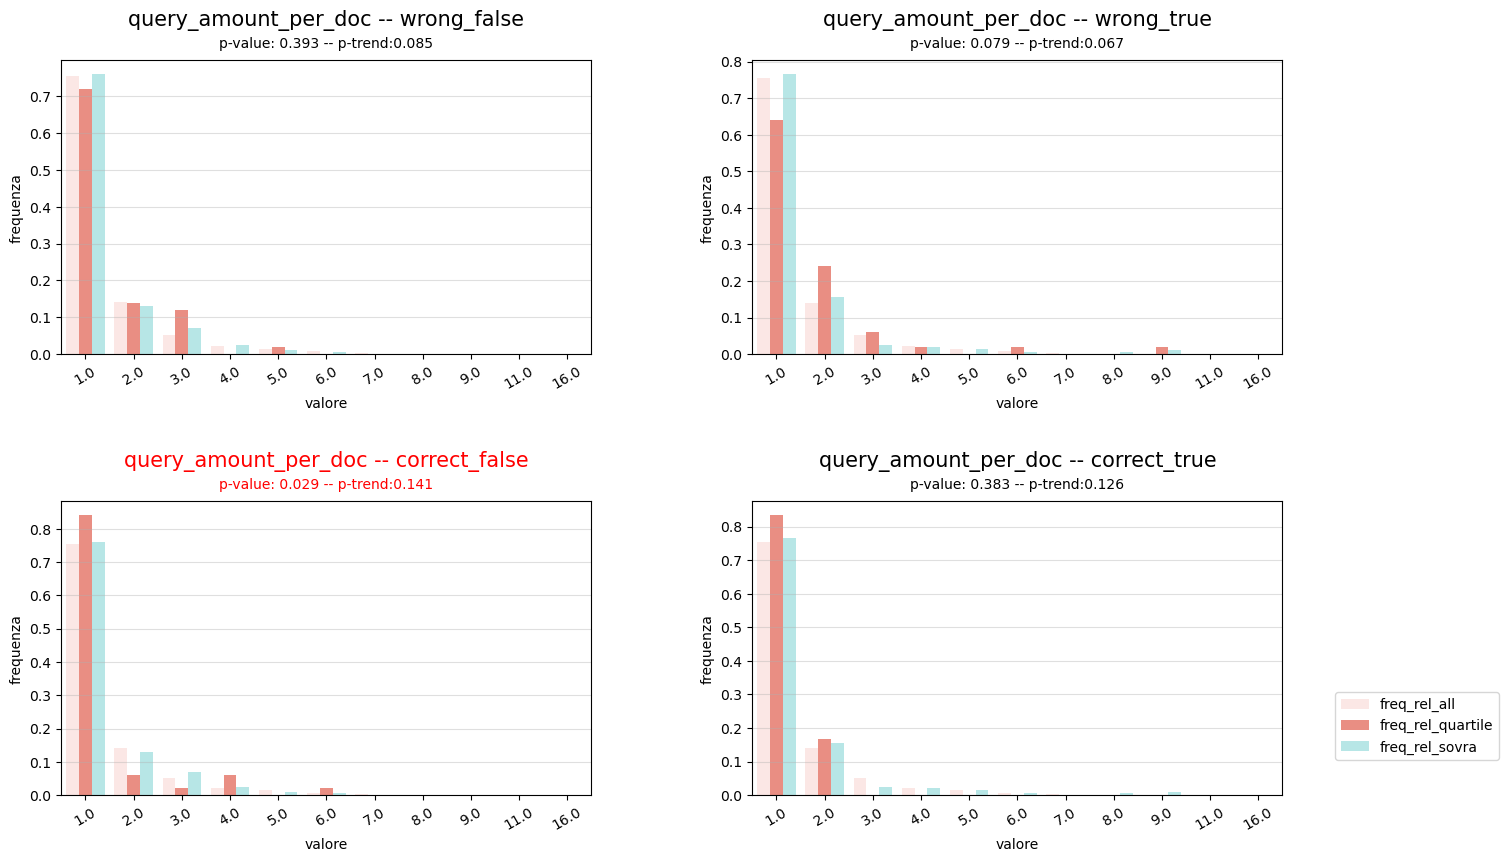

In [31]:
# solo significativi
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni,tabella_p_value, dimensione,"valore")

## Confronto a gruppi

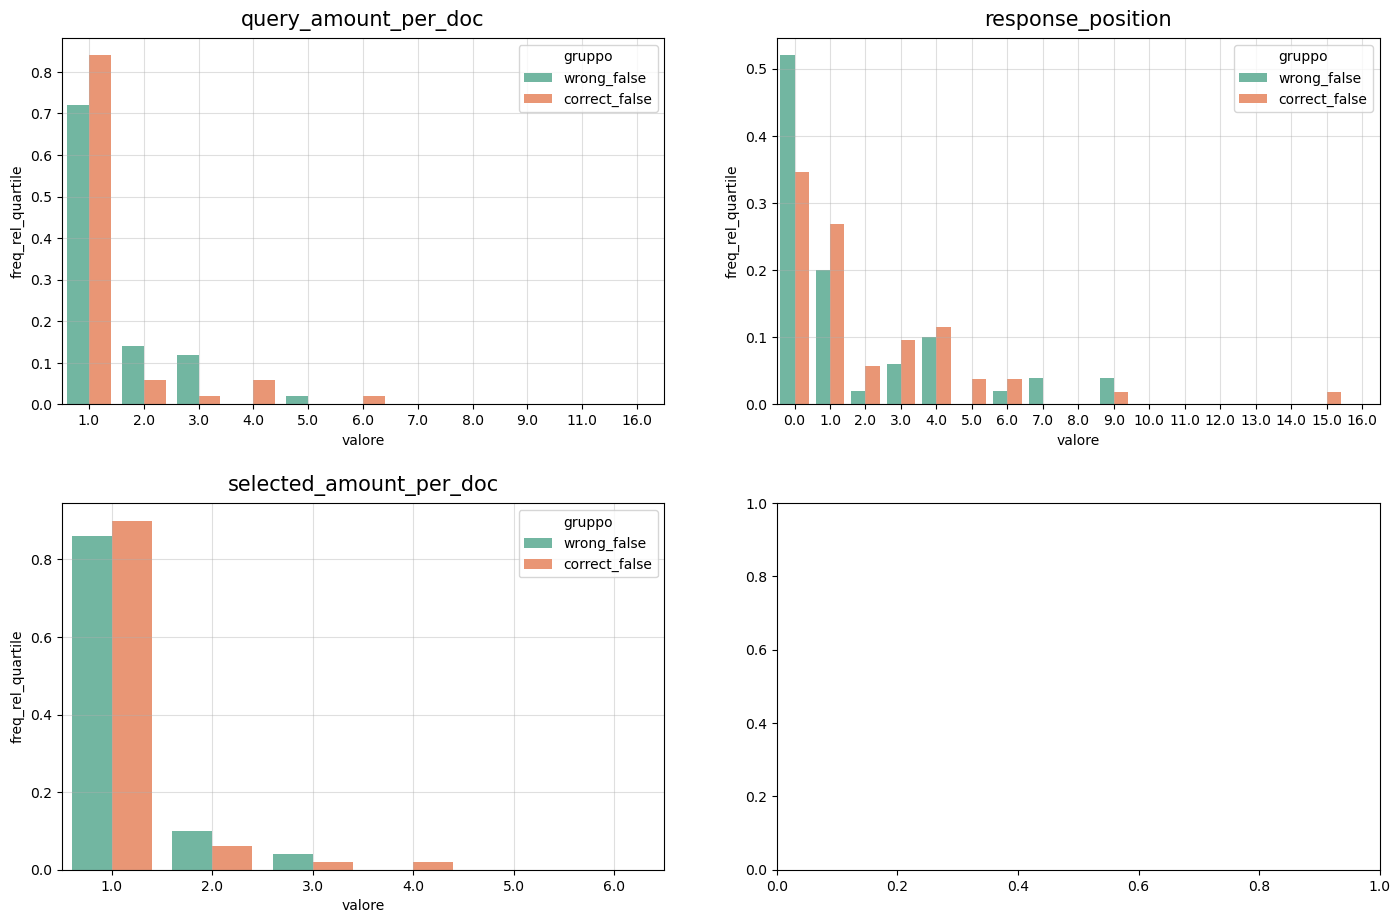

In [32]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=False, numero_per_riga = 2)

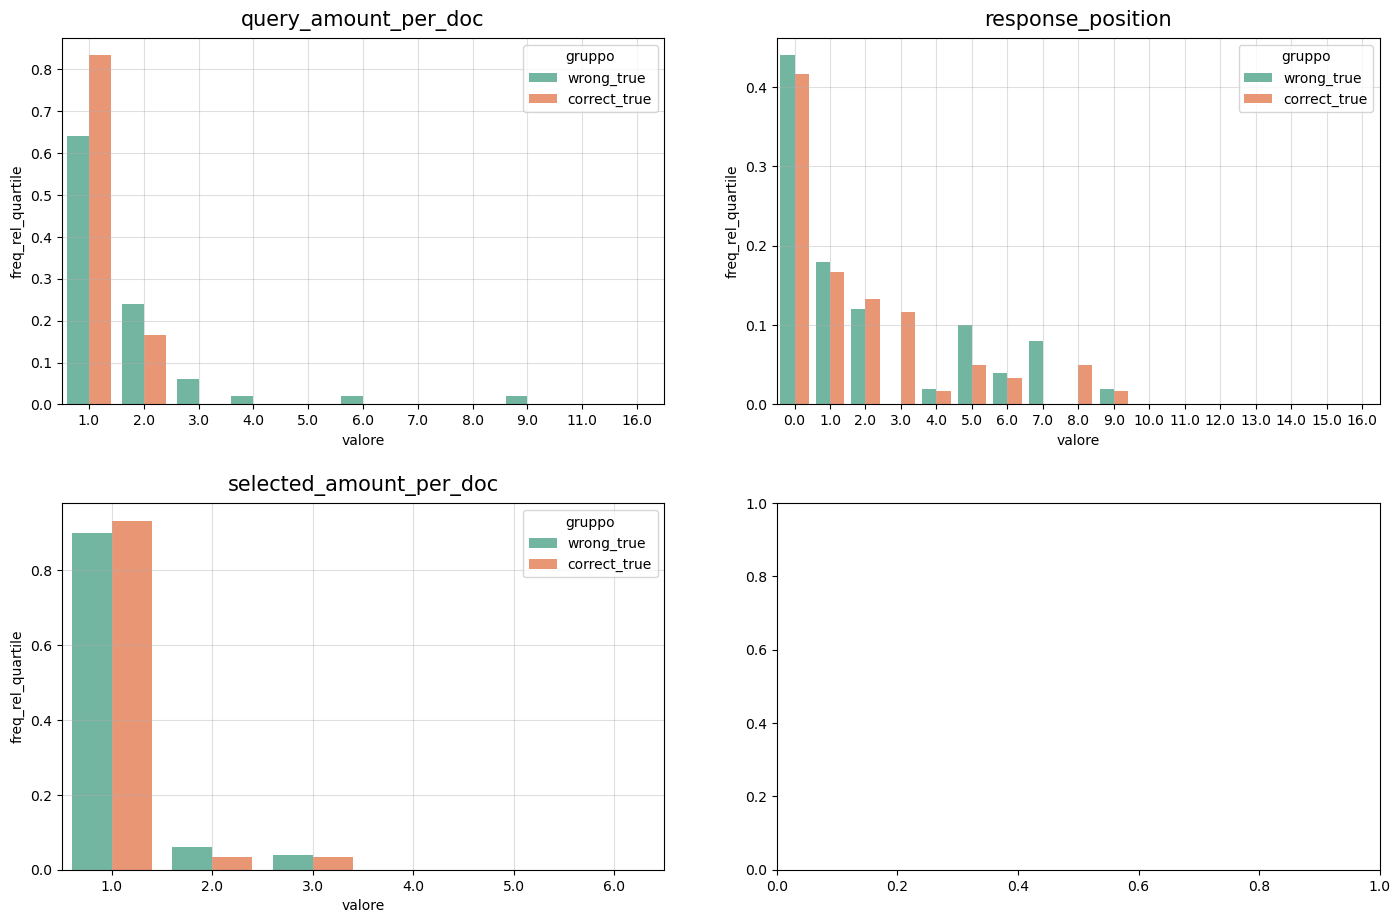

In [33]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label=False,numero_per_riga = 2)

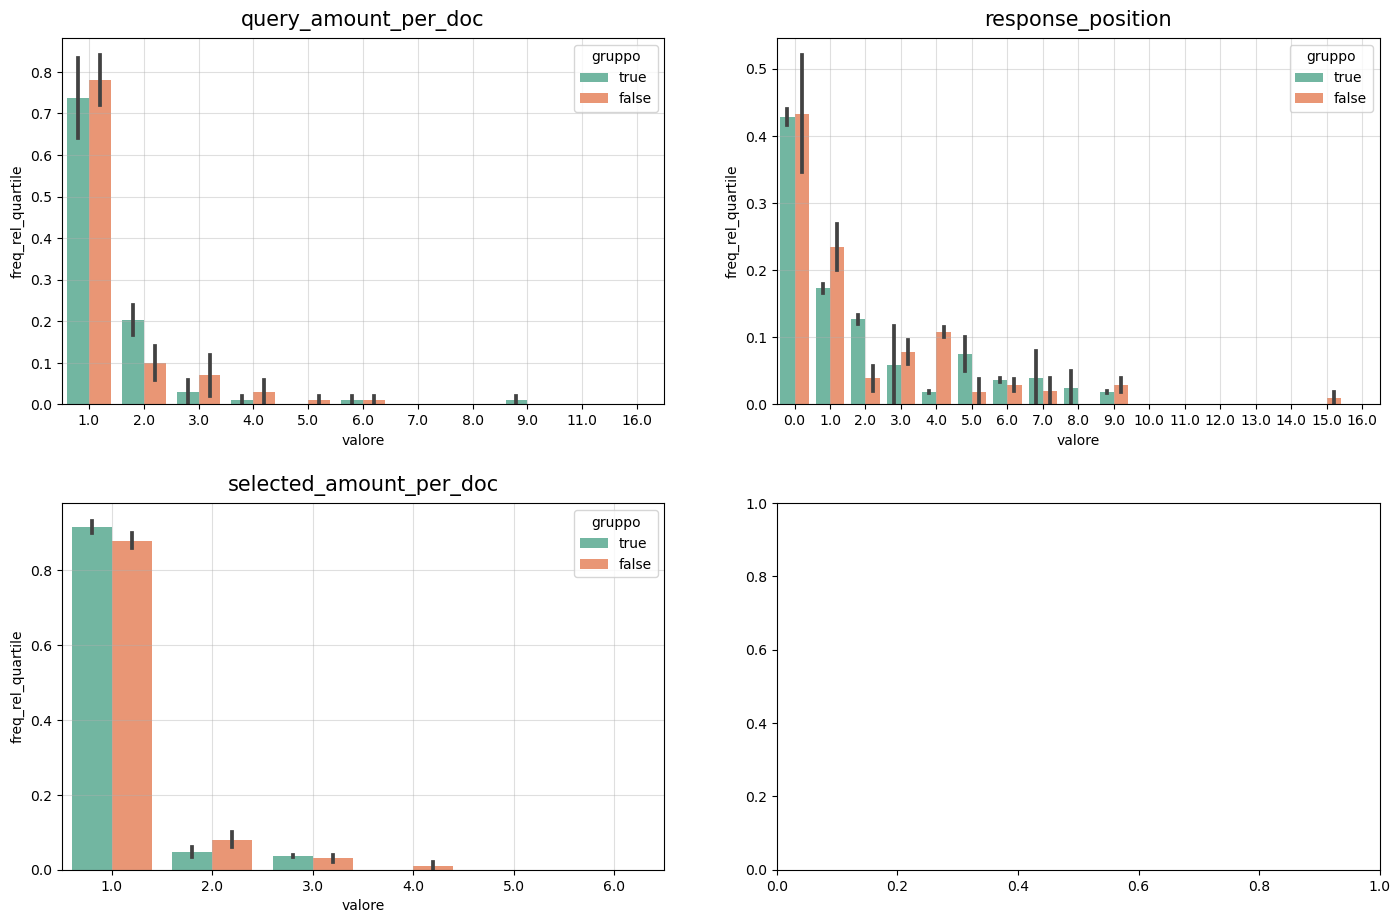

In [34]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = False,names = ["true","false"],numero_per_riga = 2)

In [35]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = False, name_gruppi = name_gruppi, solo_significativi = True)

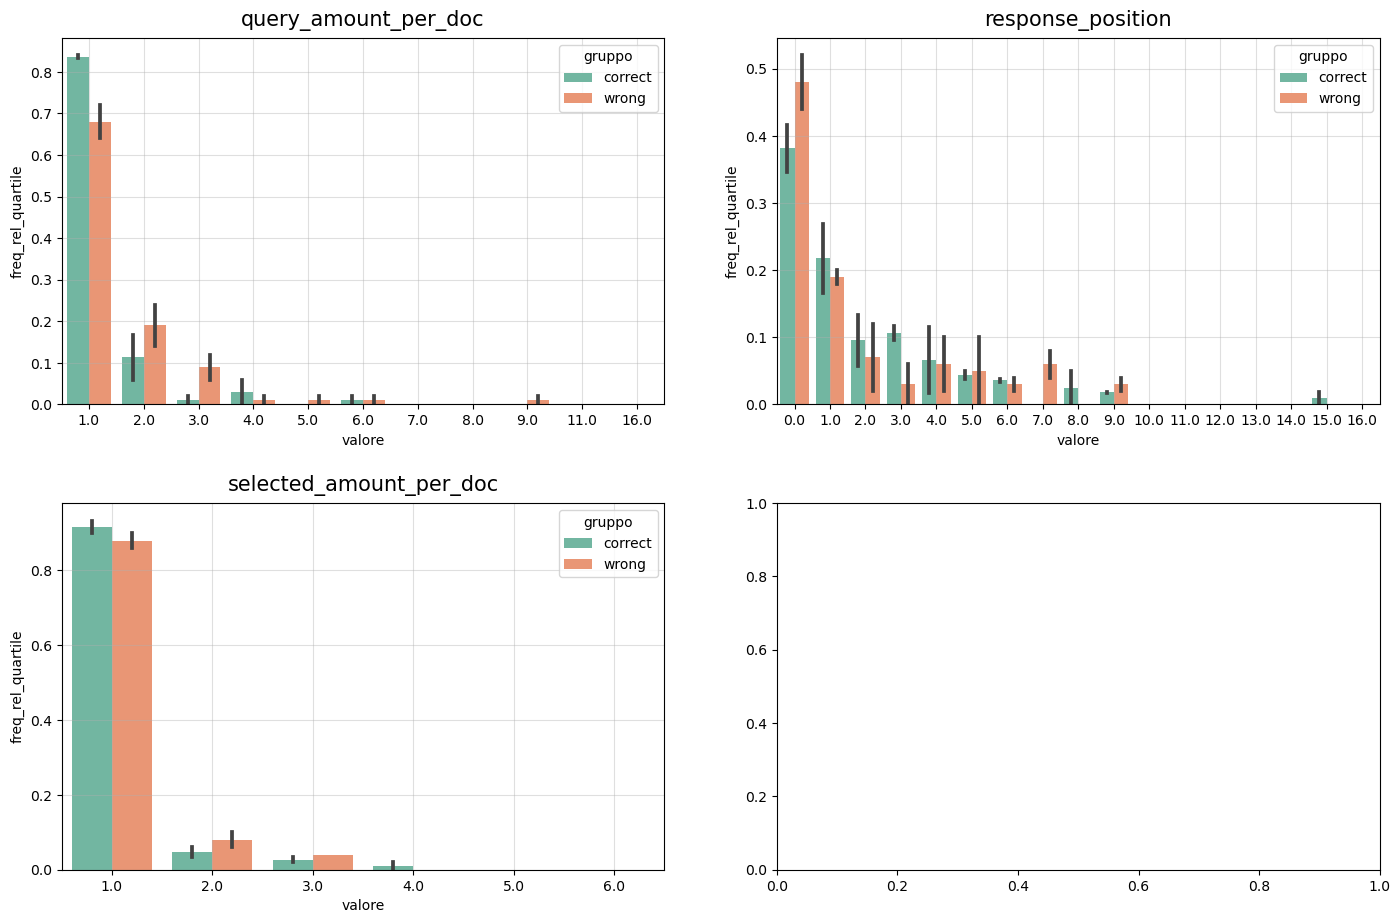

In [36]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili(raccoglitore_dimensioni,dimensioni_da_analizzare,gruppo,label = False,names = ["correct","wrong"],numero_per_riga = 2)

In [37]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = False, name_gruppi = name_gruppi, solo_significativi = True)

In [38]:
dimensioni_da_analizzare = ["sim_statem_query","sim_statem_resname","sim_statem_ressnip"]

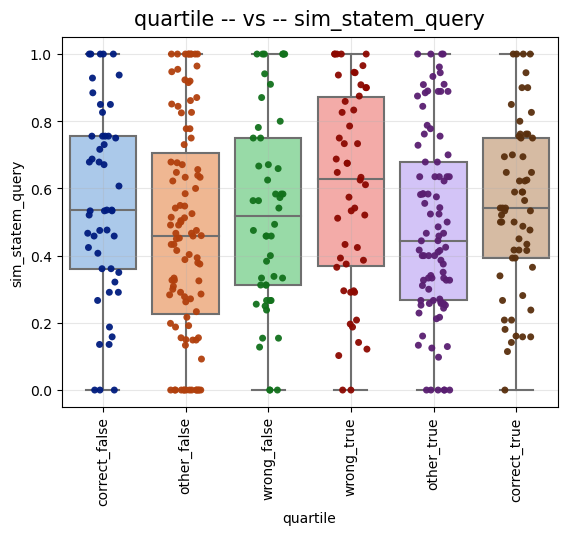

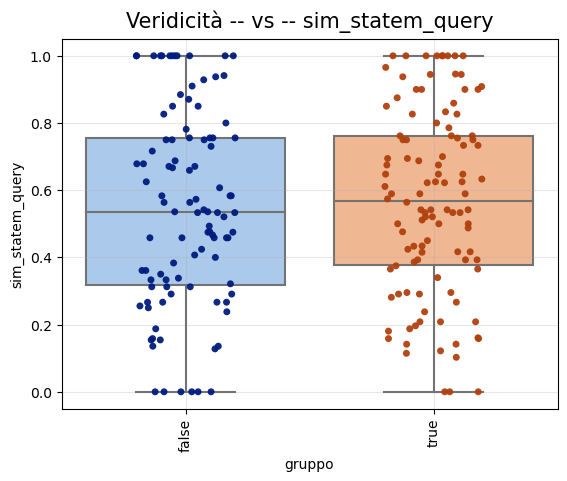

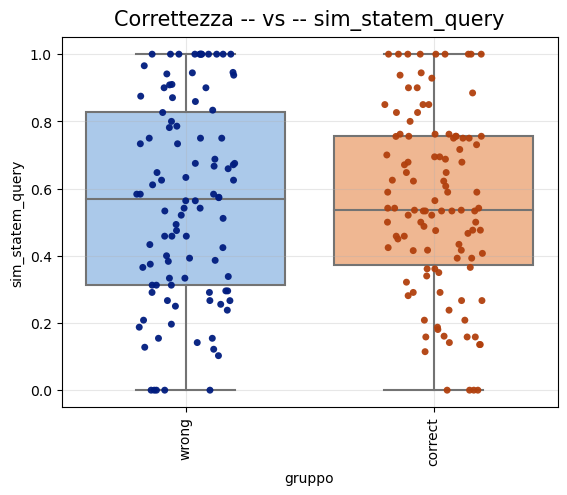

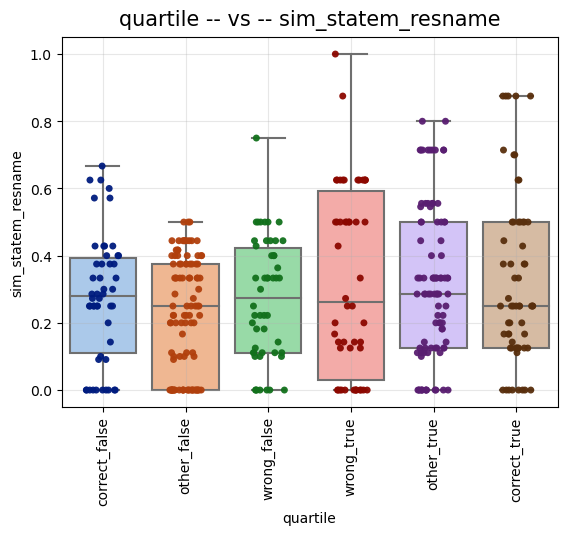

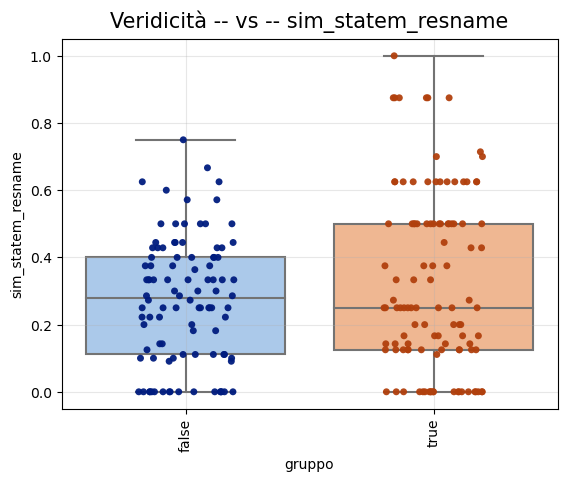

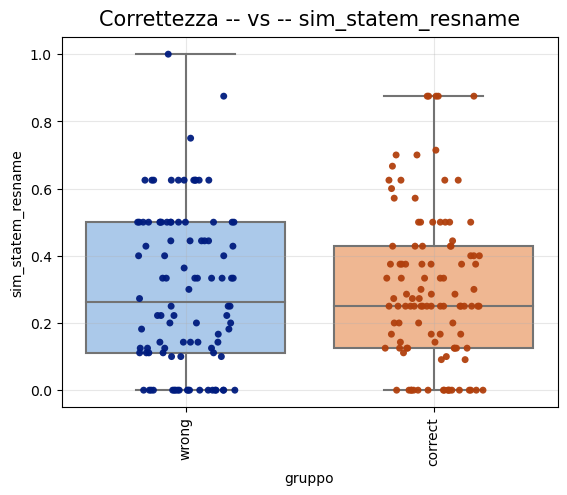

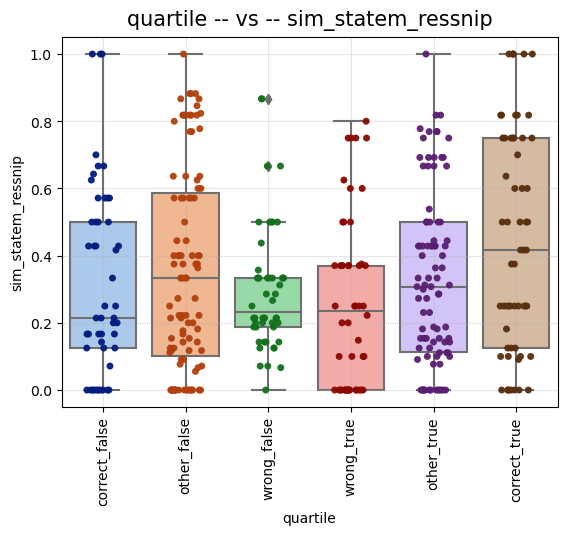

['wrong_true'] ['other_true' 'correct_true'] --> pvalue: 0.009
['correct_true'] ['other_true' 'wrong_true'] --> pvalue: 0.008


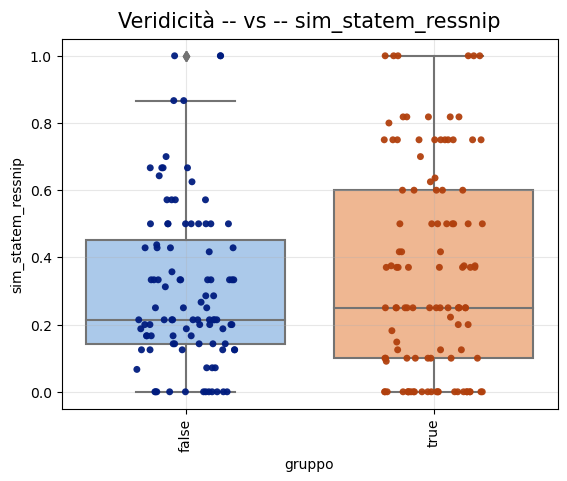

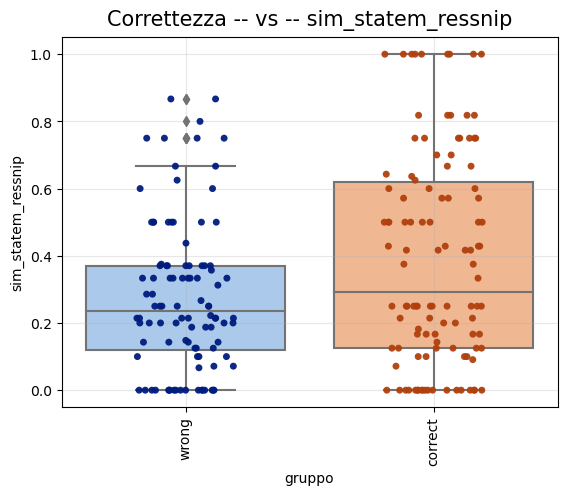

In [39]:
for dimensione in dimensioni_da_analizzare:
    crea_boxplot_e_stripplot(df_analisi, "quartile",dimensione)
    calcola_test_mann(df_analisi, dimensione,quartili, solo_significativi = True)
    crea_boxplot_e_stripplot(df_analisi, "quartile", dimensione,gruppi = [["wrong_false", "correct_false"],["wrong_true", "correct_true"]],labels = ["false","true"],titolo = "Veridicità")
    crea_boxplot_e_stripplot(df_analisi, "quartile", dimensione,gruppi = [["wrong_false", "wrong_true"],["correct_true", "correct_false"]],labels = ["wrong","correct"],titolo = "Correttezza")

## Regressione lineare

In [40]:
dimensioni_da_analizzare = ["query_amount_per_doc", 
                            "response_position",
                            "selected_amount_per_doc"] + ["sim_statem_query","sim_statem_resname","sim_statem_ressnip"]

In [41]:
df_analisi_con_mean = df_analisi.copy()
for dimensione in dimensioni_da_analizzare:
    print(dimensione[:-1]+"_mean")
    df_analisi_con_mean[dimensione[:-1]+"_mean"] = 0

for statement in df_analisi_con_mean["doc_id"].unique():
    for dim in dimensioni_da_analizzare:
        mean = np.asarray(df_analisi_con_mean[df_analisi_con_mean["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_analisi_con_mean.loc[df_analisi_con_mean["doc_id"] == statement, dim[:-1]+"_mean"] = mean 

query_amount_per_do_mean
response_positio_mean
selected_amount_per_do_mean
sim_statem_quer_mean
sim_statem_resnam_mean
sim_statem_ressni_mean


query_amount_per_doc


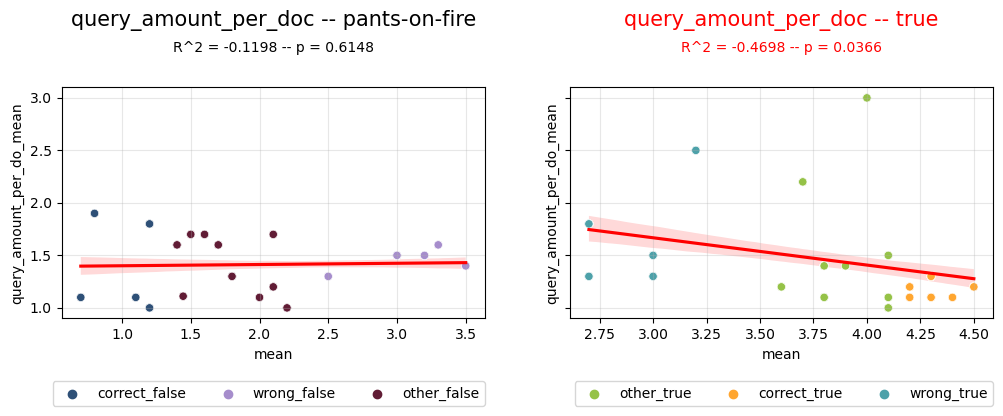

response_position


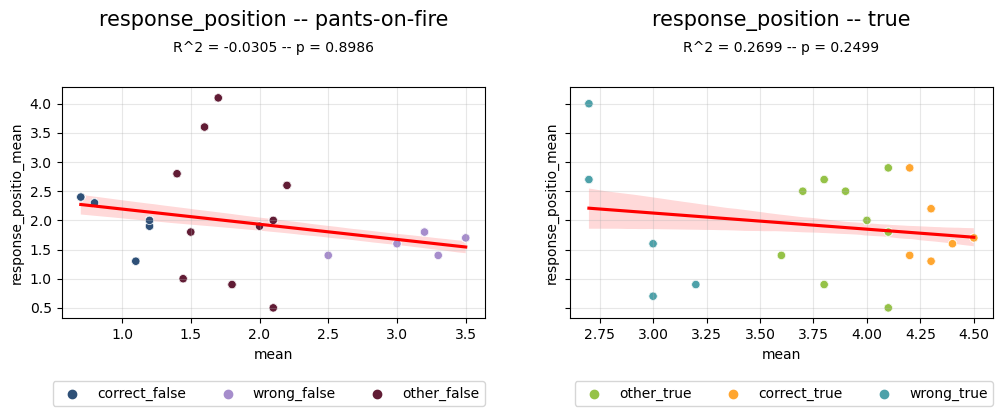

selected_amount_per_doc


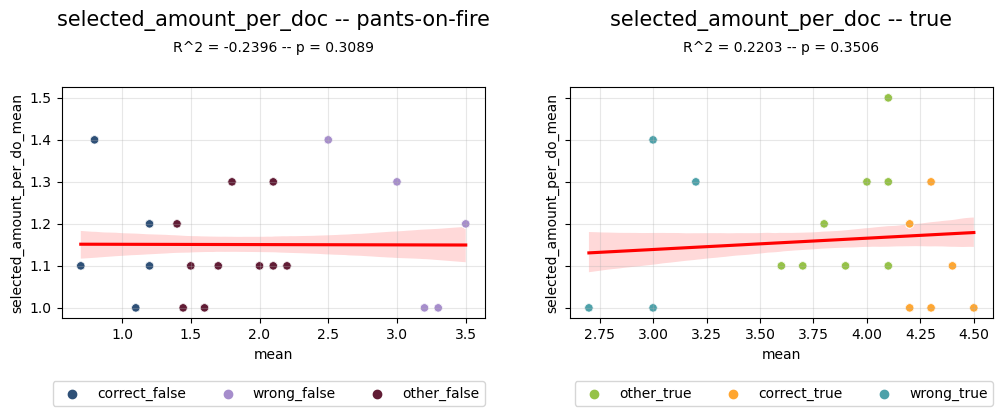

sim_statem_query


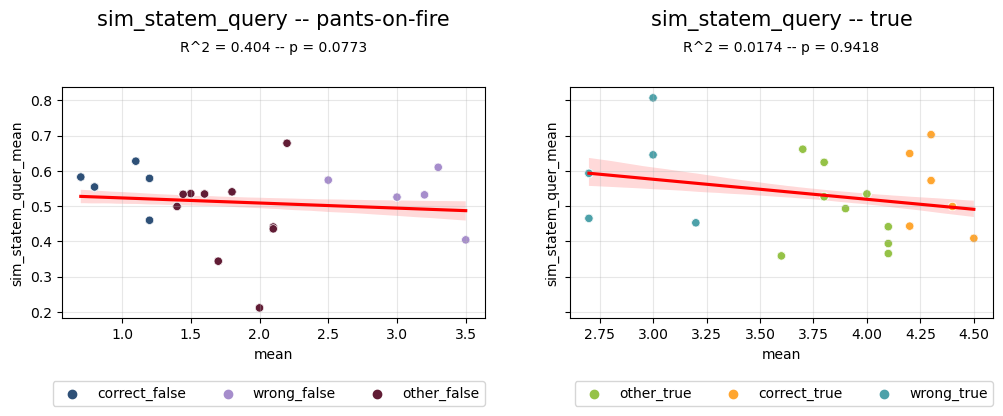

sim_statem_resname


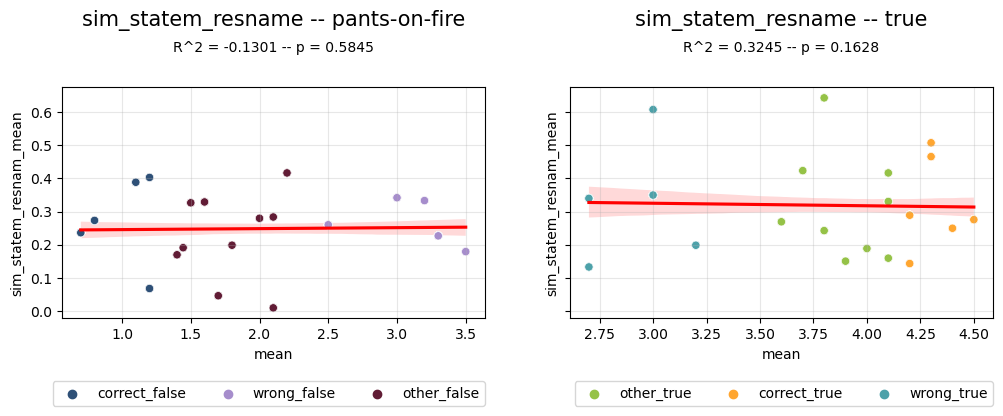

sim_statem_ressnip


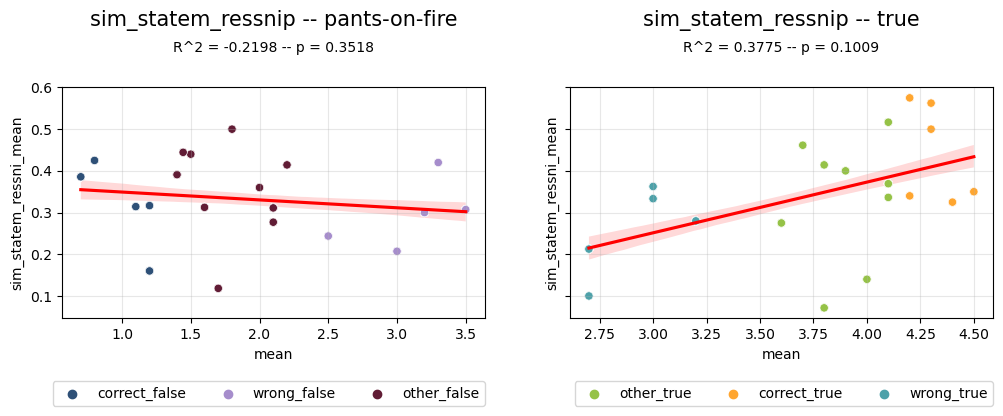

In [42]:
plot_regressione_lineare_RQ(df_analisi_con_mean,dimensioni_da_analizzare,1)

## Analisi URL

In [43]:
df_analisi["doc_evidence_url_x"]

0       https://www.desmoinesregister.com/story/news/p...
1       https://buffalonews.com/astorino-overstates-re...
2       https://www.dailymail.co.uk/news/article-10688...
3       https://www.usinnews.com/has-sen-ron-johnson-r...
4       https://www.tampabay.com/archive/2013/12/27/da...
                              ...                        
1194    https://news.yahoo.com/desantis-dumps-standard...
1195    https://www.msn.com/en-us/health/medical/this-...
1196    https://www.nrcc.org/2016/10/28/zephyr-teachou...
1197    https://www.statesman.com/story/news/politics/...
1198    https://www.usnews.com/opinion/blogs/on-energy...
Name: doc_evidence_url_x, Length: 1199, dtype: object

In [44]:
dimensioni_da_analizzare = ["doc_evidence_url_x"]

In [45]:
# tengo solo dominio dell'url
df_analisi_url = df_analisi.copy()
for index,row in df_analisi_url.iterrows():
    df_analisi_url.loc[index, "doc_evidence_url_x"] = row["doc_evidence_url_x"].split("/")[2]

In [46]:
mapping = { "doc_evidence_url_x": {}}
i = 0
for url in df_analisi_url["doc_evidence_url_x"].unique():
    mapping["doc_evidence_url_x"][i] = url
    i += 1

In [47]:
raccoglitore_dimensioni = crea_raccoglitore_dimensioni(df_analisi_url, dimensioni_da_analizzare, quartili)

In [48]:
for quartile in quartili:
    df = raccoglitore_dimensioni["doc_evidence_url_x"][quartile]
    df["index"] = 0
    for index, row in df.iterrows():
        v = [k for k, v in mapping["doc_evidence_url_x"].items() if v == row["valore"]][0]
        df.loc[index,"index"] = v
    #df = df[df["freq_rel_quartile"] > 0.01]
    df.columns = ["label","freq_ass_all","freq_ass_sovra","freq_ass_quartile","freq_rel_all","freq_rel_sovra","freq_rel_quartile","valore"]
    df = df.sort_values(by=["freq_rel_quartile"])
    raccoglitore_dimensioni["doc_evidence_url_x"][quartile] = df

In [49]:
raccoglitore_dimensioni["doc_evidence_url_x"]["wrong_false"]

,label,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile,valore
346,2000mules.com,1,1,0,0.000814,0.004785,0.000000,346
251,www.marijuanamoment.net,1,0,0,0.000814,0.000000,0.000000,251
373,www.macrotrends.net,1,0,0,0.000814,0.000000,0.000000,373
375,www.lucianne.com,1,1,0,0.000814,0.004785,0.000000,375
289,www.logically.ai,2,0,0,0.001629,0.000000,0.000000,289
...,...,...,...,...,...,...,...,...
19,wnynewsnow.com,3,3,3,0.002443,0.014354,0.052632,19
142,reason.org,3,3,3,0.002443,0.014354,0.052632,142
59,www.breitbart.com,18,4,3,0.014658,0.019139,0.052632,59
70,www.nj.com,19,6,6,0.015472,0.028708,0.105263,70


In [50]:
raccoglitore_dimensioni["doc_evidence_url_x"]

{'wrong_false':                        label  freq_ass_all  freq_ass_sovra  freq_ass_quartile  \
 346            2000mules.com             1               1                  0   
 251  www.marijuanamoment.net             1               0                  0   
 373      www.macrotrends.net             1               0                  0   
 375         www.lucianne.com             1               1                  0   
 289         www.logically.ai             2               0                  0   
 ..                       ...           ...             ...                ...   
 19            wnynewsnow.com             3               3                  3   
 142               reason.org             3               3                  3   
 59         www.breitbart.com            18               4                  3   
 70                www.nj.com            19               6                  6   
 24           ontheissues.org            28               7                  6   
 

In [51]:
tabella_p_value = costruisci_tabella_pvalue(raccoglitore_dimensioni, dimensioni_da_analizzare, quartili)
significativi = filtra_siglificativi(tabella_p_value, dimensioni_da_analizzare, quartili, 0.05,"pvalue_quartile_sovra")
significativi

,dimensione,quartile,confronto,valore_pvalue,p_trend
1,doc_evidence_url_x,wrong_false,pvalue_quartile_sovra,0.000010,0.000235
7,doc_evidence_url_x,wrong_true,pvalue_quartile_sovra,0.000054,0.001435
10,doc_evidence_url_x,correct_true,pvalue_quartile_sovra,0.000074,0.001706
4,doc_evidence_url_x,correct_false,pvalue_quartile_sovra,0.000461,0.000017


In [52]:
raccoglitore_dimensioni_filtro = {"doc_evidence_url_x":{}}
for dimensione in quartili:
    df = raccoglitore_dimensioni["doc_evidence_url_x"][dimensione]
    raccoglitore_dimensioni_filtro["doc_evidence_url_x"][dimensione] = df[df["freq_rel_quartile"] > 0.02]

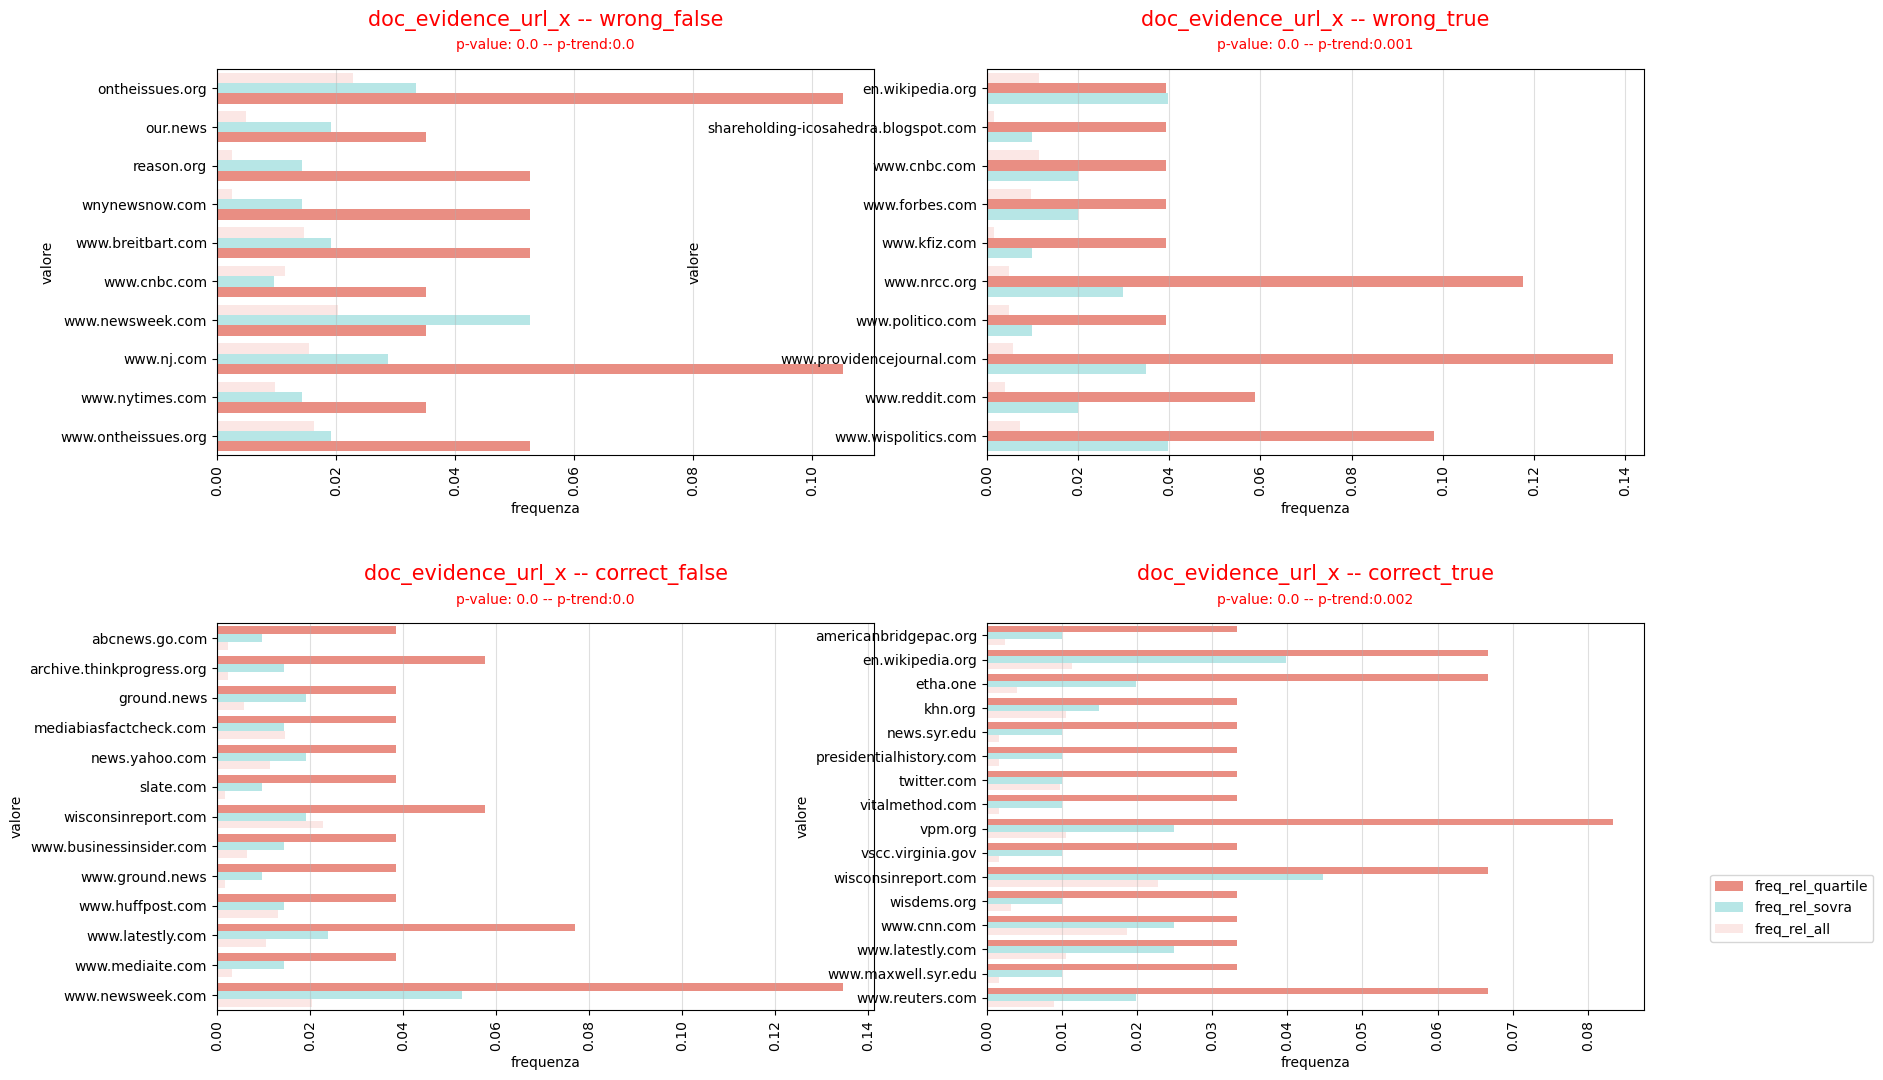

In [53]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni_filtro,tabella_p_value, dimensione,"label",rotation = 90, inverted_axes = True)

In [54]:
numero_url = 10

In [55]:
url_più_frequenti = df_analisi_url[(df_analisi_url["quartile"] != "other") & (df_analisi_url["quartile"] != "other_false") & (df_analisi_url["quartile"] != "other_true")]["doc_evidence_url_x"].value_counts().head(numero_url).index

In [56]:
url_più_frequenti

Index(['www.newsweek.com', 'www.providencejournal.com', 'wisconsinreport.com',
       'en.wikipedia.org', 'www.latestly.com', 'www.nrcc.org', 'www.nj.com',
       'vpm.org', 'www.wispolitics.com', 'www.reuters.com'],
      dtype='object')

In [57]:
raccoglitore_dimensioni_filtro = {"doc_evidence_url_x":{}}
for dimensione in quartili:
    df = raccoglitore_dimensioni["doc_evidence_url_x"][dimensione]
    df_new = []
    for index, row in df.iterrows():
        if row["label"] in url_più_frequenti:
            df_new.append(row)
    raccoglitore_dimensioni_filtro["doc_evidence_url_x"][dimensione] = pd.DataFrame(df_new)

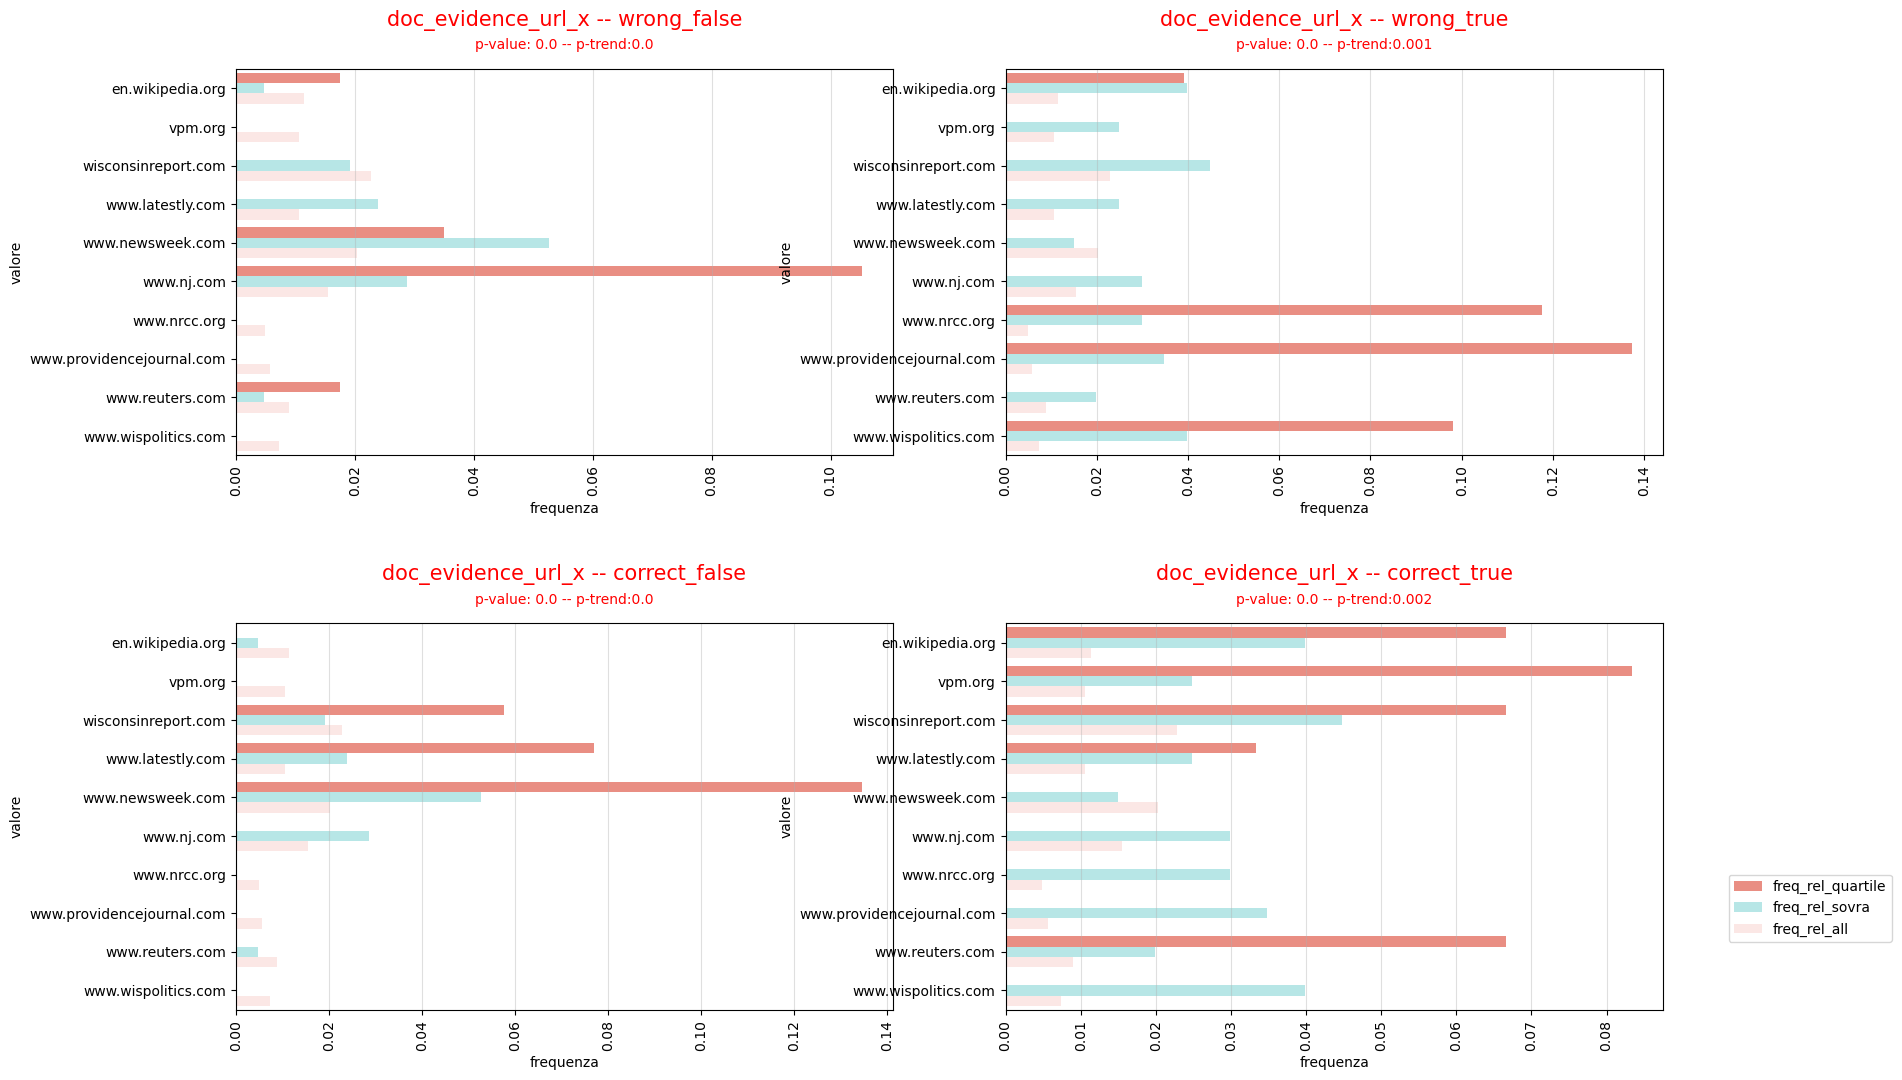

In [58]:
for dimensione in significativi["dimensione"].unique():
    crea_barplot_all(raccoglitore_dimensioni_filtro,tabella_p_value, dimensione,"label",rotation = 90, inverted_axes = True)

In [59]:

from matplotlib.colors import to_rgba
from math import ceil

def crea_barplot_gruppi_quartili_solo_una_dimensione(raccoglitore_dimensioni,dimensione,gruppo,label,names = None, numero_per_riga = 3):

    if type(gruppo[0]) == list:
        # caso in cui il gruppo è composto da più sotto gruppi
        
        sub_df = []
        a = 0
        for gr in gruppo:
            for sgr in gr:
                sub = raccoglitore_dimensioni[dimensione][sgr]
                for index, row in sub.iterrows():
                    if label:
                        sub_df.append([names[a],row["label"],row["valore"],row["freq_rel_quartile"]])
                    else:
                        sub_df.append([names[a],row["valore"],row["freq_rel_quartile"]])
            a = a + 1
        
        if label:        
            sub_df = pd.DataFrame(sub_df, columns=["gruppo","label","valore","freq_rel_quartile"])
            sns.barplot(data=sub_df,y = "label",x = "freq_rel_quartile", hue ="gruppo", palette = "Set2", orient = "h")
            #sns.barplot(data=sub_df,y = "freq_rel_quartile",x = "label", hue ="gruppo", palette = "Set2")
        else:
            sub_df = pd.DataFrame(sub_df, columns=["gruppo","valore","freq_rel_quartile"])
            sns.barplot(data=sub_df,y = "valore",x = "freq_rel_quartile", hue ="gruppo", palette = "Set2", orient = "h")
           # sns.barplot(data=sub_df,y = "freq_rel_quartile",x = "valore", hue ="gruppo", palette = "Set2")
        
        plt.grid(alpha=0.4)
        plt.title(dimensione,loc="center", fontsize=15, fontweight=0, color='black', y=1.01)
        plt.tick_params(axis='x', rotation=90)
        
    else: 
        # caso in cui il gruppo è composto da un solo sotto gruppo
        
        sub_df = []

        for gr in gruppo:
            sub = raccoglitore_dimensioni[dimensione][gr]
            for index, row in sub.iterrows():
                if label:
                    sub_df.append([gr,row["label"],row["valore"],row["freq_rel_quartile"]])
                else:
                    sub_df.append([gr,row["valore"],row["freq_rel_quartile"]])
                
        if label:        
            sub_df = pd.DataFrame(sub_df, columns=["gruppo","label","valore","freq_rel_quartile"])
            sns.barplot(data=sub_df,y = "label",x = "freq_rel_quartile", hue ="gruppo", palette = "Set2", orient = "h")
            #sns.barplot(data=sub_df,y = "freq_rel_quartile",x = "label", hue ="gruppo", palette = "Set2")
        else:
            sub_df = pd.DataFrame(sub_df, columns=["gruppo","valore","freq_rel_quartile"])
            sns.barplot(data=sub_df,y = "valore",x = "freq_rel_quartile", hue ="gruppo", palette = "Set2", orient = "h")
            #sns.barplot(data=sub_df,y = "freq_rel_quartile",x = "valore", hue ="gruppo", palette = "Set2")
        plt.grid(alpha=0.4)
        plt.title(dimensione,loc="center", fontsize=15, fontweight=0, color='black', y=1.01)
        plt.tick_params(axis='x', rotation=90)
        
    plt.show()

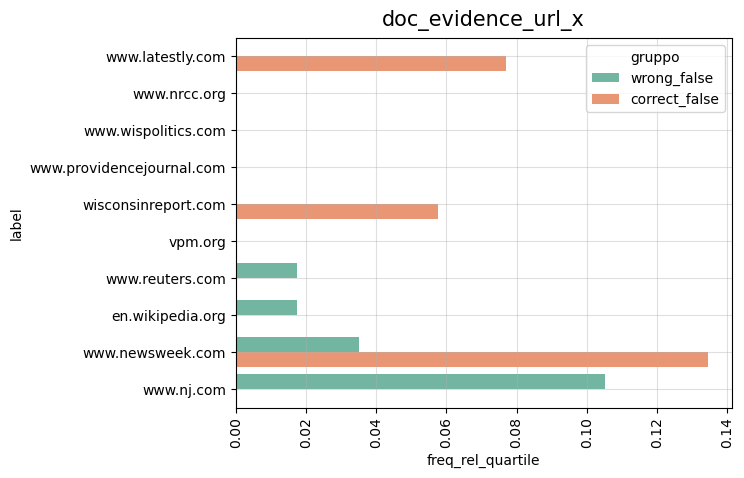

In [60]:
gruppo = ["wrong_false", "correct_false"]
crea_barplot_gruppi_quartili_solo_una_dimensione(raccoglitore_dimensioni_filtro,"doc_evidence_url_x",gruppo,label=True)

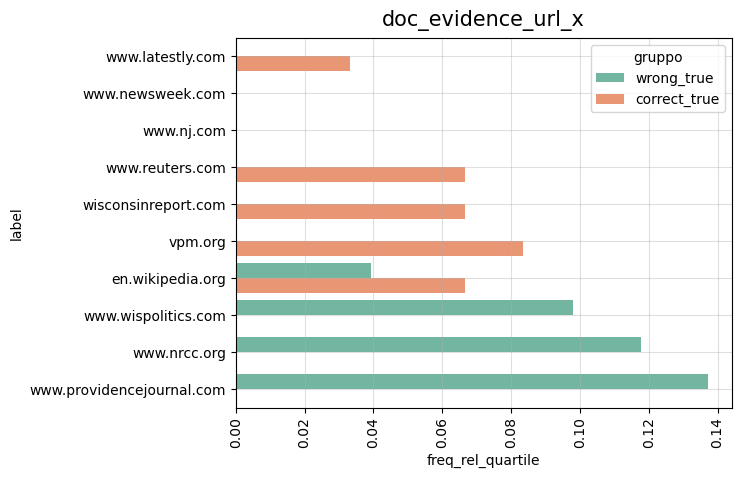

In [61]:
gruppo = ["wrong_true", "correct_true"]
crea_barplot_gruppi_quartili_solo_una_dimensione(raccoglitore_dimensioni_filtro,"doc_evidence_url_x",gruppo,label=True)

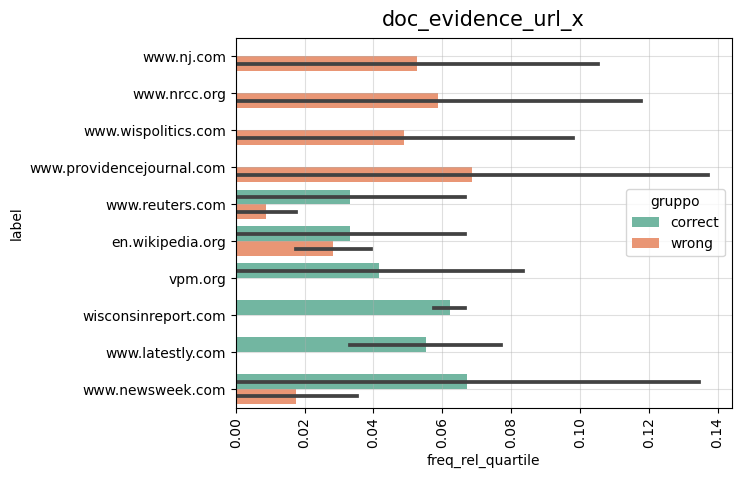

In [62]:
gruppo = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
crea_barplot_gruppi_quartili_solo_una_dimensione(raccoglitore_dimensioni_filtro,"doc_evidence_url_x",gruppo,label = True,names = ["correct","wrong"])

In [63]:
gruppi_quartili = [["correct_false", "correct_true"],["wrong_false", "wrong_true"]]
name_gruppi = ["correct","wrong"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

correct doc_evidence_url_x 8.212733652921869e-09
wrong doc_evidence_url_x 9.93961919337837e-20


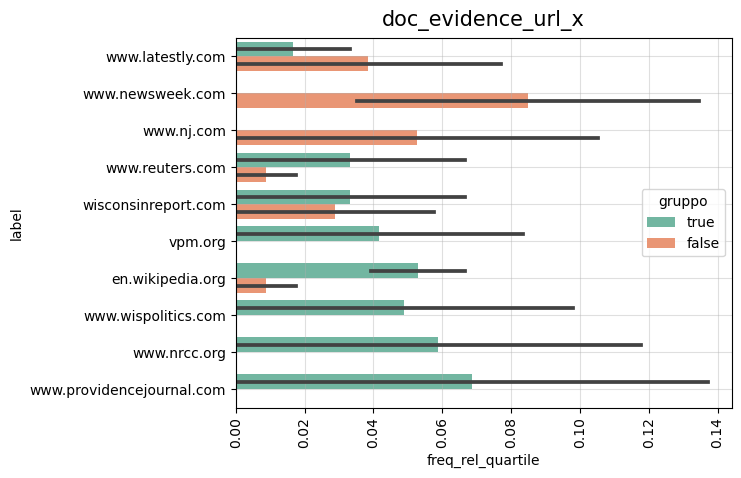

In [64]:
gruppo = [["wrong_true", "correct_true"],["wrong_false", "correct_false"]]
crea_barplot_gruppi_quartili_solo_una_dimensione(raccoglitore_dimensioni_filtro,"doc_evidence_url_x",gruppo,label = True,names = ["true","false"])

In [65]:
gruppi_quartili = [["correct_true", "wrong_true"],["wrong_false", "correct_false"]]
name_gruppi = ["true","false"]
calcola_p_value_gruppi_quartili(raccoglitore_dimensioni_filtro, dimensioni_da_analizzare, gruppi_quartili,label = True, name_gruppi = name_gruppi, solo_significativi = True)

true doc_evidence_url_x 6.520403878365589e-10
false doc_evidence_url_x 0.013434082308773434


## Salvo i dati

In [66]:
df_analisi.to_csv(index=False, path_or_buf = "../Datasets/df_Q4.csv")